In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def show(image):
  plt.figure(figsize=(20,10))
  plt.imshow(image)

In [ ]:
original_image = cv.imread('/content/drive/MyDrive/University/Computer Vision/Project/Blood Cells/cells.png')

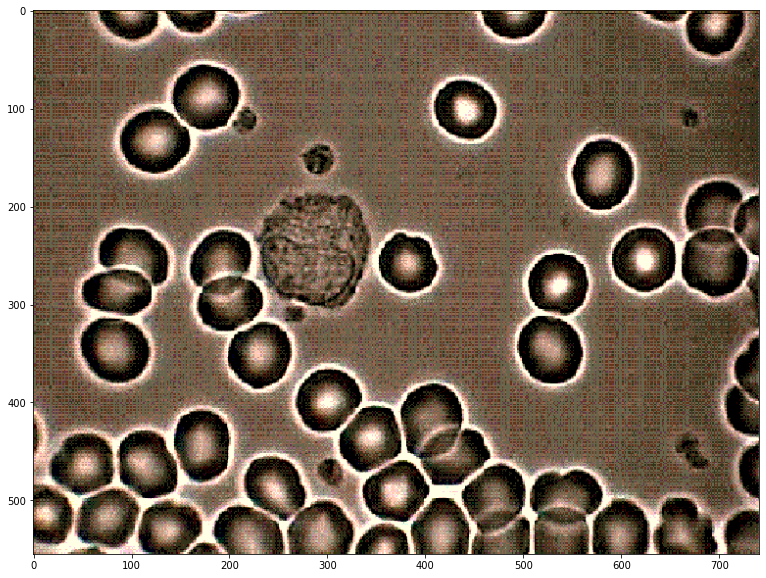

In [ ]:
show(original_image)

In [ ]:
img = cv.cvtColor(original_image,cv.COLOR_BGR2GRAY)

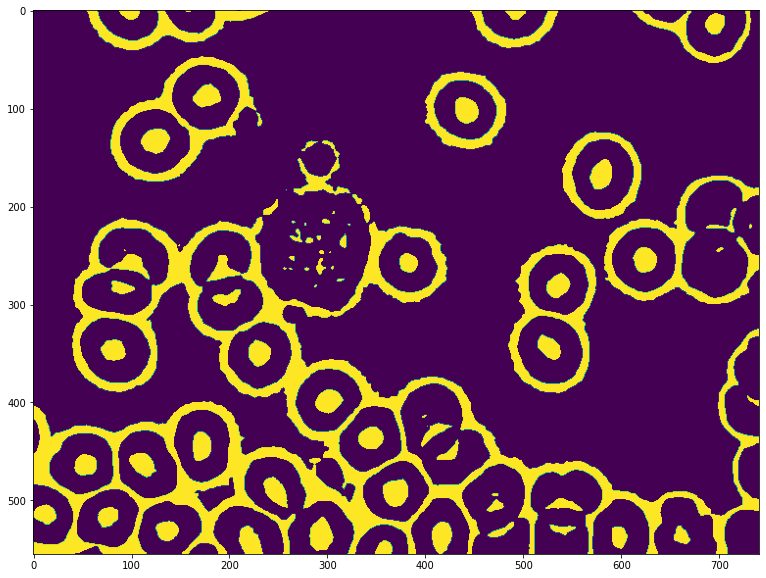

In [ ]:
# Размытие, Бинаризация Оцу, удаление фона
img = cv.GaussianBlur(img,(9,9),0)
ret3,res = cv.threshold(img,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
show(res)

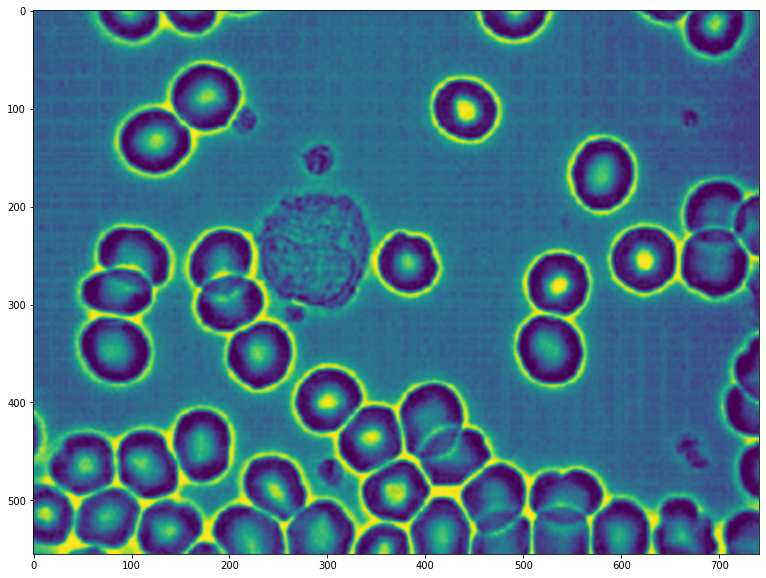

In [ ]:
# Преобразование из одного цветового пространсва в другое
img1 = cv.cvtColor(original_image,cv.COLOR_BGR2GRAY)
img1 = cv.GaussianBlur(img1,(7,7),0)
show(img1)

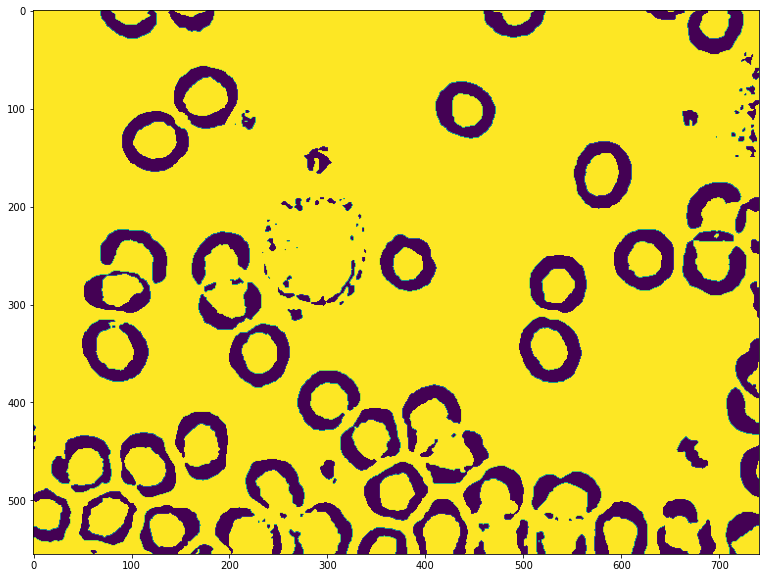

In [ ]:
ret3,res1 = cv.threshold(img1,45,255,cv.THRESH_BINARY)
show(res1)

In [ ]:
cimg = img1.copy()

In [ ]:
# Преобразование Хафа для нахождения окружностей
circles = cv.HoughCircles(res1,cv.HOUGH_GRADIENT,1,51,
                            param1=180,param2=11,minRadius=21,maxRadius=49)
circles.shape

(1, 35, 3)

In [ ]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,0,0),2)
    cv.circle(cimg,(i[0],i[1]),2,(0,0,0),2)

Найдено клеток:  (35, 3)


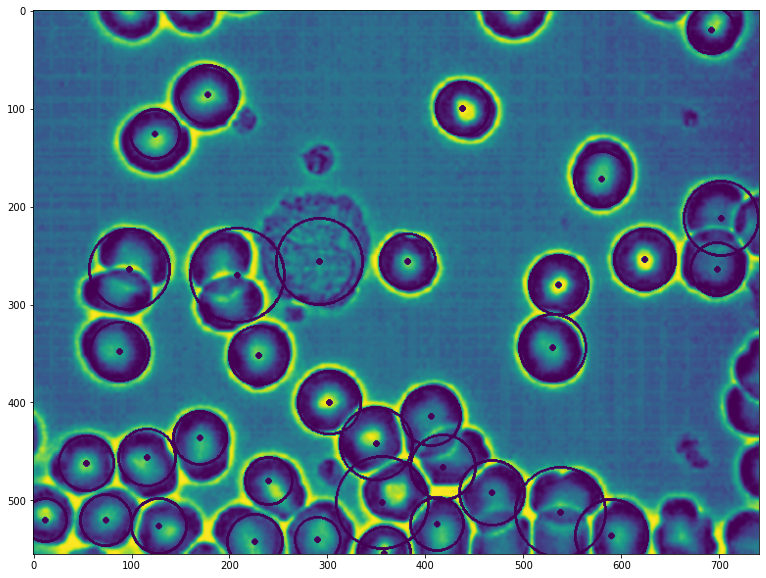

In [ ]:
show(cimg)
print("Найдено клеток: ", circles[0].shape)

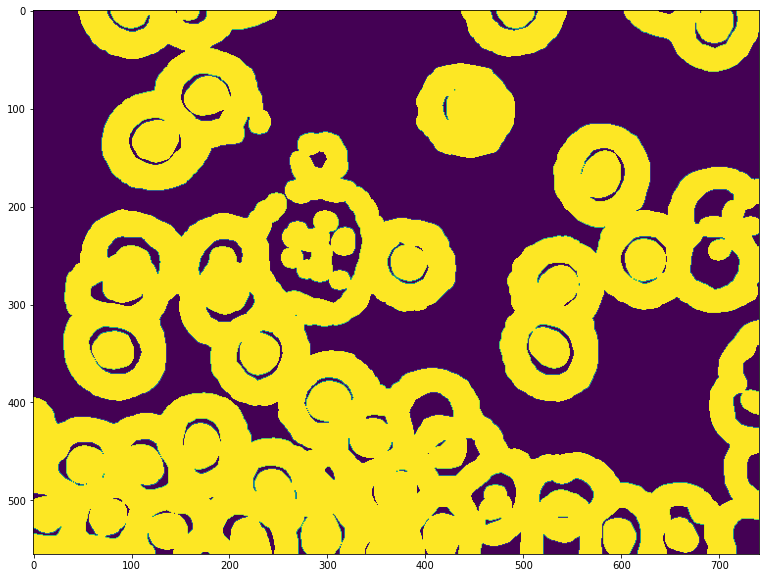

In [ ]:
# Уменьшение шума
kernel = np.ones((3,3),np.uint8)
erode = cv.erode(res, kernel,iterations=1)
dilate = cv.dilate(erode, kernel, kernel,iterations=1)

# Создание маски, полученной с помощью дилатации
elem = cv.getStructuringElement(cv.MORPH_ELLIPSE,(19,19))
mask = cv.dilate(dilate, elem, iterations=1)
show(mask)

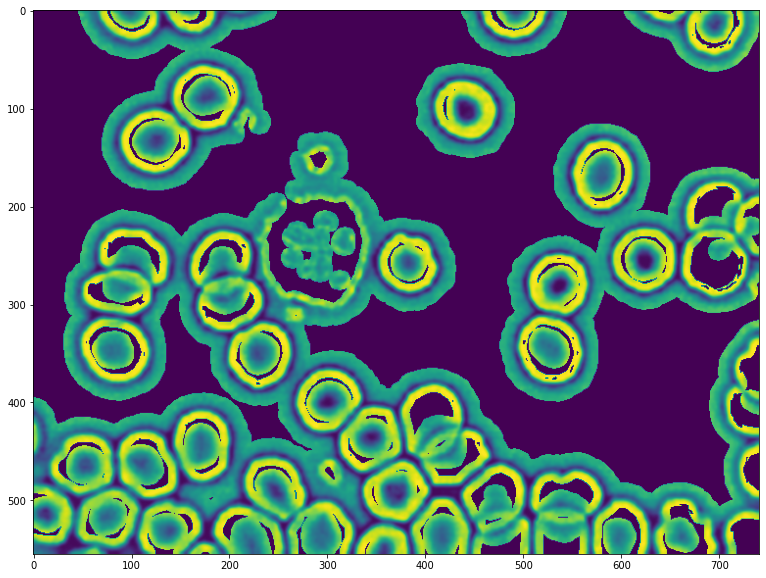

In [ ]:
# Перемножение исходного полутонового изображения на маску
mult = img * mask
show(mult)

In [ ]:
cimg = img.copy()

In [ ]:
circles = cv.HoughCircles(mult,cv.HOUGH_GRADIENT,1,40,
                            param1=150,param2=17,minRadius=27,maxRadius=40)
circles.shape

(1, 39, 3)

In [ ]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
#     центр окружность
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#     окружность
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),2)

Найдено клеток:  (39, 3)


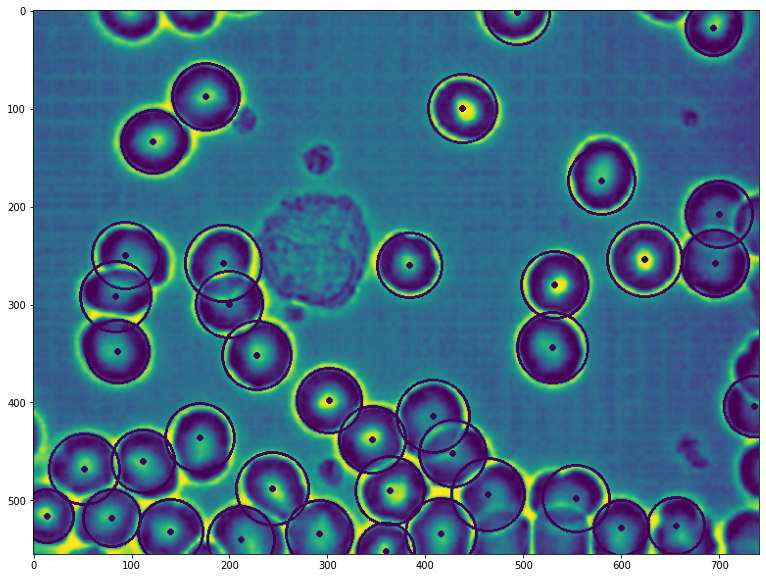

In [ ]:
show(cimg)
print("Найдено клеток: ", circles[0].shape)